# Model Building(Task 3 and 4)

In this section , we are going to predict the number of cases using two models : the LinearRegression Model and the ArimaModel.

In [ ]:
# Importing all the important libraries
import matplotlib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import datetime as dt
import operator
plt.style.use('seaborn')
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


In [ ]:
datelist = pd.date_range(start="2018-09-09",end="2020-02-02")
datelist

DatetimeIndex(['2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18',
               ...
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02'],
              dtype='datetime64[ns]', length=512, freq='D')

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

We are reading in the files of covid reports.

In [ ]:
Data = pd.read_csv("D:/BENKYOU-SECOND SEMESTER/Discrete Structure/Assignment Files/WHO-COVID-19-global-data.csv",  parse_dates=True)

In [ ]:
Data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
129612,6/28/2021,ZW,Zimbabwe,AFRO,424,46442,11,1736
129613,6/29/2021,ZW,Zimbabwe,AFRO,842,47284,13,1749
129614,6/30/2021,ZW,Zimbabwe,AFRO,1249,48533,12,1761
129615,7/1/2021,ZW,Zimbabwe,AFRO,1331,49864,28,1789


In [ ]:
Data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
Data.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
129612,6/28/2021,ZW,Zimbabwe,AFRO,424,46442,11,1736
129613,6/29/2021,ZW,Zimbabwe,AFRO,842,47284,13,1749
129614,6/30/2021,ZW,Zimbabwe,AFRO,1249,48533,12,1761
129615,7/1/2021,ZW,Zimbabwe,AFRO,1331,49864,28,1789
129616,7/2/2021,ZW,Zimbabwe,AFRO,1357,51221,19,1808


In [ ]:
Data.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
Data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,129617.000000,1.296170e+05,129617.000000,129617.000000
mean,1406.599914,2.472912e+05,30.507757,5964.537707
std,9536.592465,1.548975e+06,170.925267,31266.123335
min,-32952.000000,0.000000e+00,-60.000000,0.000000
25%,0.000000,2.000000e+01,0.000000,0.000000
50%,8.000000,2.577000e+03,0.000000,43.000000
75%,297.000000,5.026500e+04,4.000000,821.000000
max,414188.000000,3.334396e+07,6508.000000,599680.000000


In [ ]:
Data.isnull().sum()

Date_reported          0
Country_code         547
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [ ]:
Data['Date_reported'] = pd.to_datetime(Data['Date_reported'])
start_date = '2020-06-01'
end_date = '2021-05-31'
mask = (Data['Date_reported']>= start_date) & (Data['Date_reported']<= end_date)& (Data['Country']== 'Viet Nam')
betonamu = Data.loc[mask, ['Date_reported','New_cases'] ]
Dates = pd.date_range(start="2020-06-01",end="2021-05-31")


Here , I am filtering data and choosing only the ones that are related to Viet Nam.

In [ ]:
betonamu

,Date_reported,New_cases
127033,2020-06-01,0
127034,2020-06-02,0
127035,2020-06-03,0
127036,2020-06-04,0
127037,2020-06-05,0
...,...,...
127393,2021-05-27,180
127394,2021-05-28,245
127395,2021-05-29,301
127396,2021-05-30,251


In [ ]:
days_since_6_1_2020 = np.array([i for i in range(len(Dates))]).reshape(-1, 1)

We are making predictions for the next 90 days, so days_in_future = 90

In [ ]:
days_in_future = 90
future_forecast = np.array([i for i in range(len(Dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-90]


Here we are trying to make the data more stationary (the means and variance of the data more consistent) so that it can be used by the Arima model. We are doing this by calculating the difference in new cases of the current day and the previous day, for all days in the dataset.

Text(0.5, 1.0, 'Viet Nam')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


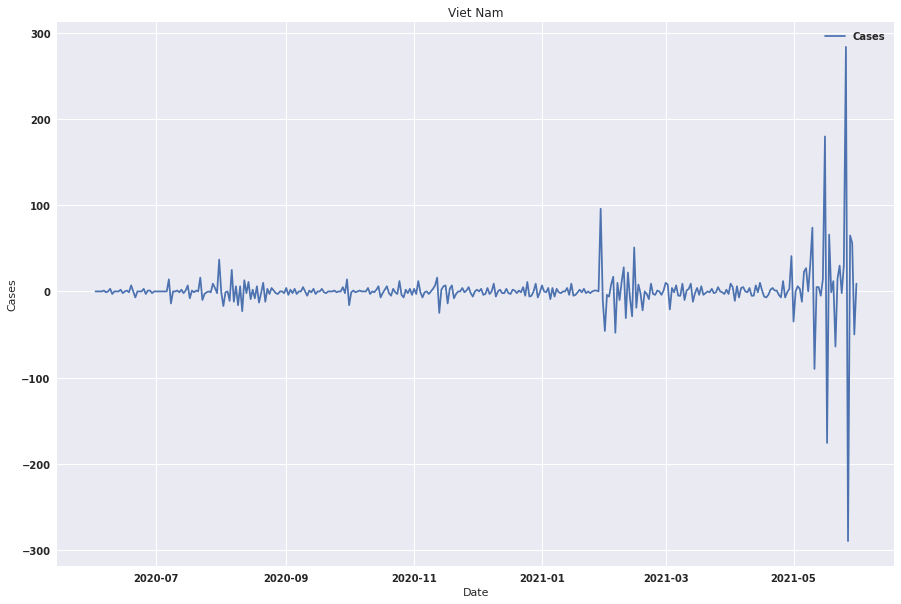

In [ ]:

diff = betonamu.diff().dropna()
fig = plt.figure(figsize=(15,10))
plt.plot(Dates[1:],np.array(diff['New_cases']).reshape(-1,1),label = "Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(loc='best')
plt.title("Viet Nam")

In [ ]:
betonamu

,Date_reported,New_cases
127033,2020-06-01,0
127034,2020-06-02,0
127035,2020-06-03,0
127036,2020-06-04,0
127037,2020-06-05,0
...,...,...
127393,2021-05-27,180
127394,2021-05-28,245
127395,2021-05-29,301
127396,2021-05-30,251


In [ ]:
len(diff['New_cases'])

364

In [ ]:
diff['New_cases']

127034      0.0
127035      0.0
127036      0.0
127037      0.0
127038      1.0
          ...  
127393   -290.0
127394     65.0
127395     56.0
127396    -50.0
127397      9.0
Name: New_cases, Length: 364, dtype: float64

Here we are taking 99 percents of data as training data for the algorithm and makes prediction about the next 90 days

In [ ]:
from sklearn.linear_model import LinearRegression
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_6_1_2020,betonamu['New_cases'], test_size=0.01, shuffle=False)
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 220.84923197788015
MSE: 49253.28644700647


In [ ]:
y_train_confirmed

127033      0
127034      0
127035      0
127036      0
127037      0
         ... 
127389    158
127390    156
127391    186
127392    470
127393    180
Name: New_cases, Length: 361, dtype: int64

In [ ]:
len(adjusted_dates)

365

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


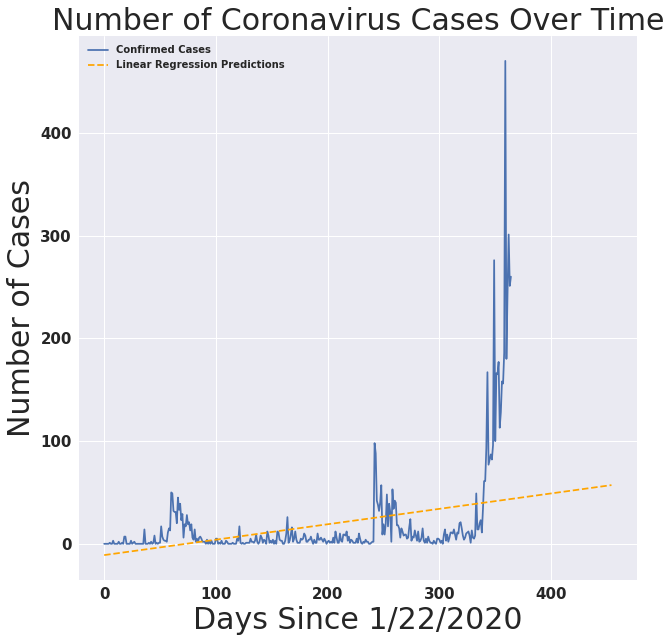

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(adjusted_dates, betonamu['New_cases'])
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

As we can see, our the fitting line does not do an excellent job predicting the cases, since in Vietnam, the later dates are much more turbulent. Now we are using the Arma model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(betonamu['New_cases'], start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3326.563, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3481.663, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3378.932, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3327.748, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3479.888, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3325.502, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3327.372, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3324.783, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3326.678, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3326.700, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3326.470, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3325.375, Time=0.08 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 1.142 seconds
                               SARIMAX Results                                
Dep. Vari

Here it shows that the best arima model is arima(3,1,1)

C:\Users\KhoaLeVjpPro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


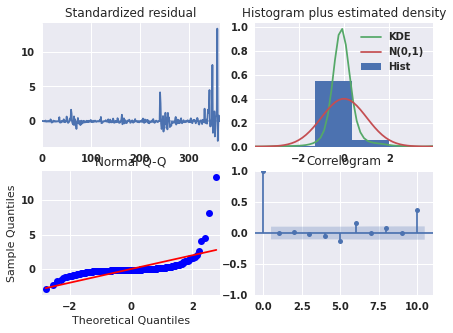

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
Dates

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', length=365, freq='D')

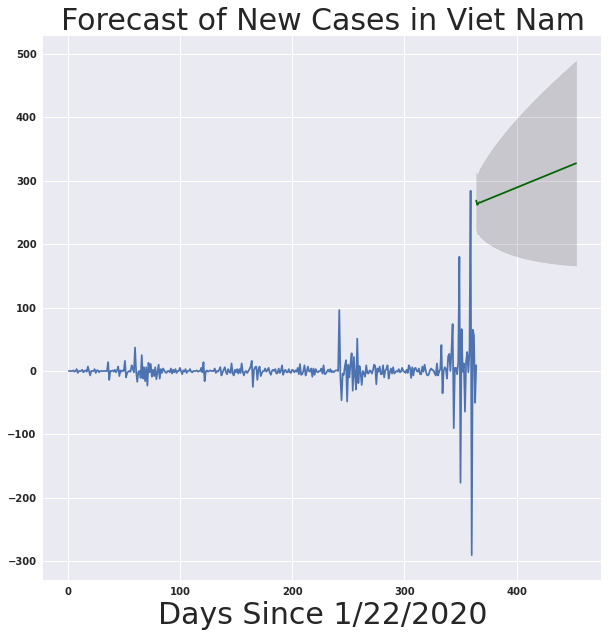

In [ ]:
# Forecast
n_periods = 90
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(diff['New_cases']), len(diff['New_cases'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(days_since_6_1_2020[1:],diff['New_cases'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of New Cases in Viet Nam", size = 30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.show()

In [ ]:
fc

array([268.57009439, 261.81762348, 264.25609205, 265.90510137,
       265.54481455, 266.58638208, 267.40972122, 267.9786973 ,
       268.75736349, 269.48985391, 270.19161817, 270.92416747,
       271.64802693, 272.36842205, 273.09325376, 273.81655805,
       274.53951525, 275.26309974, 275.98642789, 276.70972947,
       277.43311796, 278.15646488, 278.87981152, 279.60316993,
       280.32652178, 281.04987411, 281.773228  , 282.49658088,
       283.2199339 , 283.94328712, 284.66664019, 285.38999329,
       286.11334642, 286.83669952, 287.56005263, 288.28340574,
       289.00675885, 289.73011196, 290.45346506, 291.17681817,
       291.90017128, 292.62352439, 293.3468775 , 294.07023061,
       294.79358372, 295.51693683, 296.24028994, 296.96364305,
       297.68699616, 298.41034926, 299.13370237, 299.85705548,
       300.58040859, 301.3037617 , 302.02711481, 302.75046792,
       303.47382103, 304.19717414, 304.92052725, 305.64388036,
       306.36723346, 307.09058657, 307.81393968, 308.53

In [ ]:
confint

array([[223.70673257, 313.43345621],
       [215.39969824, 308.23554871],
       [215.61008987, 312.90209422],
       [213.14693641, 318.66326632],
       [210.55539351, 320.53423559],
       [209.24462106, 323.92814309],
       [207.6038008 , 327.21564164],
       [205.99967475, 329.95771985],
       [204.63831456, 332.87641242],
       [203.27832541, 335.70138241],
       [201.9769472 , 338.40628914],
       [200.75653613, 341.09179882],
       [199.57819715, 343.71785672],
       [198.44863025, 346.28821386],
       [197.36754848, 348.81895905],
       [196.32683346, 351.30628264],
       [195.3254752 , 353.75355529],
       [194.36131053, 356.16488895],
       [193.43137721, 358.54147857],
       [192.53393756, 360.88552138],
       [191.66718003, 363.19905589],
       [190.82933212, 365.48359764],
       [190.01891532, 367.74070772],
       [189.23453403, 369.97180582],
       [188.47489275, 372.17815081],
       [187.73881907, 374.36092916],
       [187.02522357, 376.52123243],
 

The green line is the prediction of the new cases in VietNam in the next 90 days. We can also see that although the accuracy is not high, it is a bit better than Linear Regression. Now we will perform the forecasting for other countries with Linear Regression.

In [ ]:


def Linear_Model (countryname) :
    import matplotlib
    import numpy as np
    import pandas as pd 
    import matplotlib.pyplot as plt 
    import matplotlib.colors as mcolors
    import random
    import math
    import time
    from sklearn.model_selection import RandomizedSearchCV, train_test_split
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from datetime import datetime
    import datetime as dt
    import operator
    plt.style.use('seaborn')
    %matplotlib inline 
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (20,3)
    Data = pd.read_csv("D:/BENKYOU-SECOND SEMESTER/Discrete Structure/Assignment Files/WHO-COVID-19-global-data.csv",  parse_dates=True)
    Data['Date_reported'] = pd.to_datetime(Data['Date_reported'])
    start_date = '2020-06-01'
    end_date = '2021-05-31'
    mask = (Data['Date_reported']>= start_date) & (Data['Date_reported']<= end_date)& (Data['Country']== countryname)
    country = Data.loc[mask, ['Date_reported','New_cases'] ]
    Dates = pd.date_range(start=start_date,end= end_date)
    Added_Dates = pd.date_range(start='2020-06-01', end = datetime.today())
    days_since_6_1_2020_Adjusted = np.array([i for i in range(len(Added_Dates))]).reshape(-1, 1)

    days_since_6_1_2020 = np.array([i for i in range(len(Dates))]).reshape(-1, 1)
    days_in_future = 90
    future_forecast = np.array([i for i in range(len(Dates)+days_in_future)]).reshape(-1, 1)
    adjusted_dates = future_forecast[:-90]

    from sklearn.linear_model import LinearRegression
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_6_1_2020,country['New_cases'], test_size=0.01, shuffle=False)
    linear_model = LinearRegression(normalize=True, fit_intercept=True)
    linear_model.fit(X_train_confirmed, y_train_confirmed)
    test_linear_pred = linear_model.predict(X_test_confirmed)
    linear_pred = linear_model.predict(future_forecast)
    print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
    print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

    plt.figure(figsize=(10, 10))
    plt.plot(adjusted_dates, country['New_cases'])
    plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
    plt.title('Number of Coronavirus Cases Over Time in ' + str(countryname) , size=30)
    plt.xlabel('Days Since 01/06/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()



MAE: 85934.31631619761
MSE: 7410624073.234009


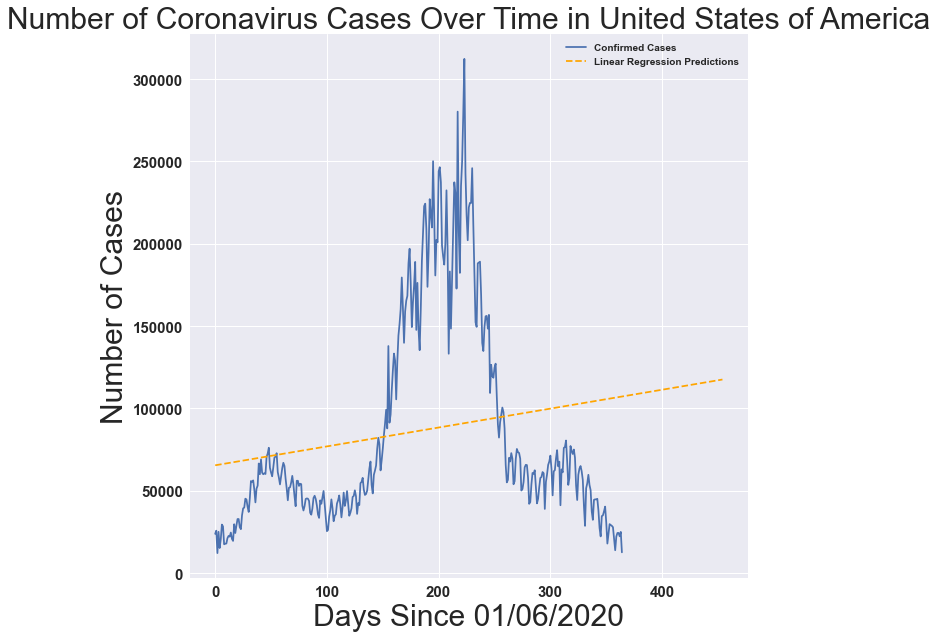

In [ ]:
Linear_Model('United States of America')

MAE: 434.56232559444555
MSE: 200432.0148500781


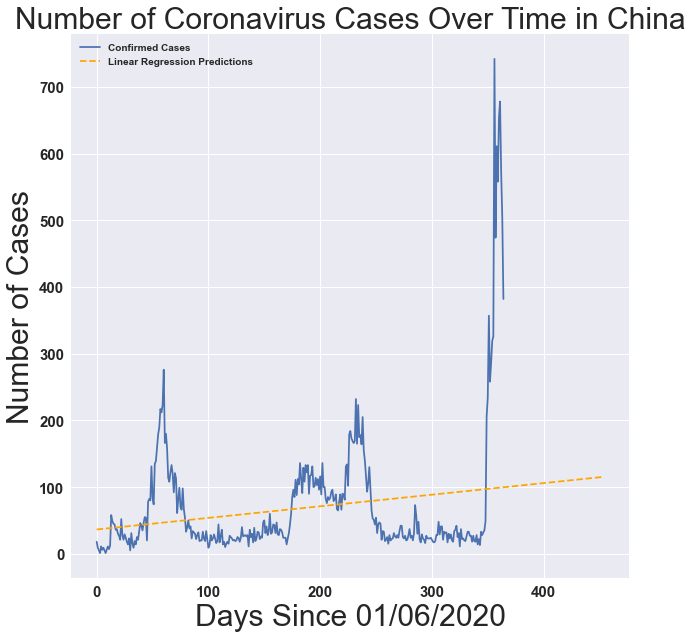

In [ ]:
Linear_Model('China')

MAE: 12972.878254847608
MSE: 232923389.37247562


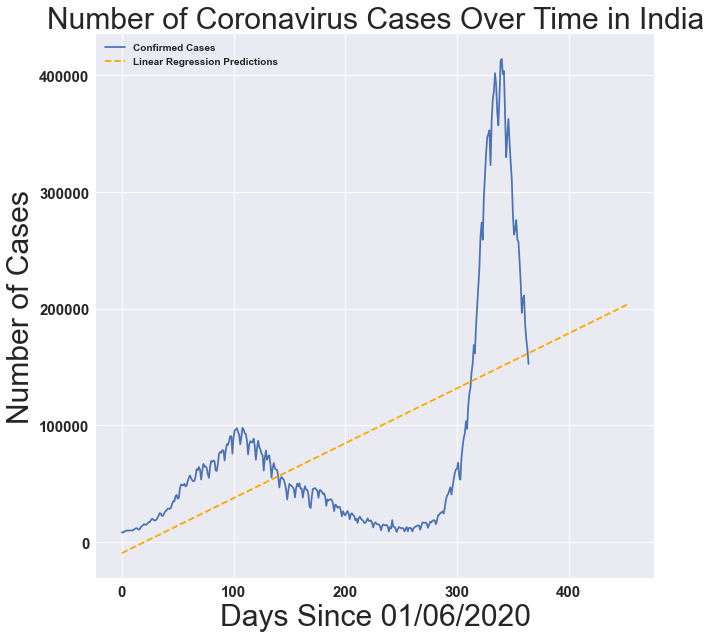

In [ ]:
Linear_Model('India')

MAE: 591.2452754268647
MSE: 636730.3108204335


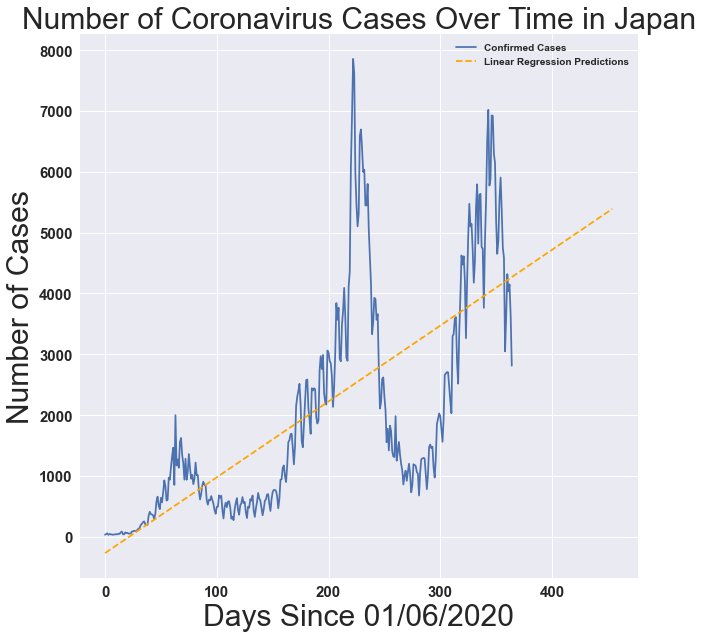

In [ ]:
Linear_Model('Japan')

In [ ]:
len(Dates)

365

In [ ]:
 Added_Dates = pd.date_range(start='2020-06-01', end = datetime.today())
 days_since_6_1_2020_Adjusted = np.array([i for i in range(len(Added_Dates))]).reshape(-1, 1)

MAE: 12591.095348249946
MSE: 185721388.90355742


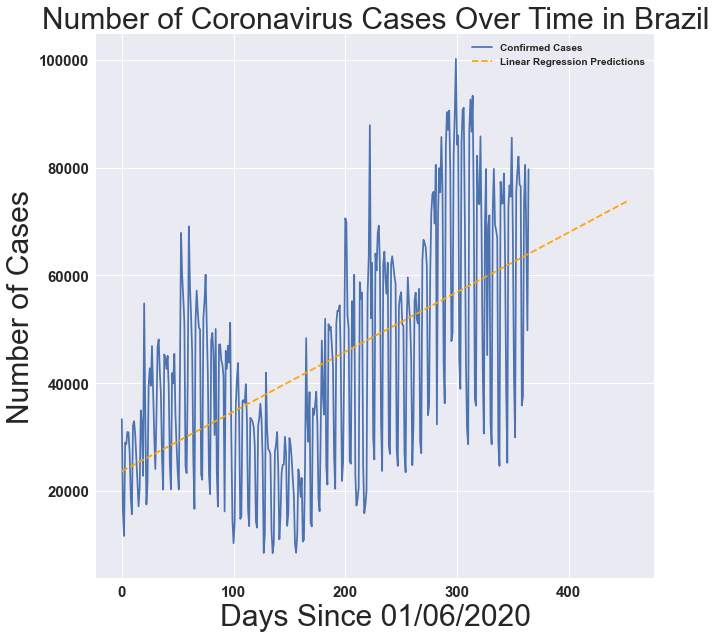

In [ ]:
Linear_Model('Brazil')

Last but not least, we move on with Arima models in different countries across the world in the same period of time. Noted that this is computed not by the original data, but rather by the "Smoothed" Data, so the y axis is not the number of cases.

In [ ]:
def Arima_Model(countryname):
    import matplotlib
    import numpy as np
    import pandas as pd 
    import matplotlib.pyplot as plt 
    import matplotlib.colors as mcolors
    import random
    import math
    import time
    from sklearn.model_selection import RandomizedSearchCV, train_test_split
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from datetime import datetime
    import datetime as dt
    import operator
    plt.style.use('seaborn')
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (20,20)

    Data = pd.read_csv("D:/BENKYOU-SECOND SEMESTER/Discrete Structure/Assignment Files/WHO-COVID-19-global-data.csv",  parse_dates=True)
    Data['Date_reported'] = pd.to_datetime(Data['Date_reported'])
    start_date = '2020-06-01'
    end_date = '2021-06-30'
    mask = (Data['Date_reported']>= start_date) & (Data['Date_reported']<= end_date)& (Data['Country']== countryname)
    country = Data.loc[mask, ['Date_reported','New_cases'] ]

    Dates = pd.date_range(start=start_date,end=end_date)
    days_since_6_1_2020 = np.array([i for i in range(len(Dates))]).reshape(-1, 1)

    Added_Dates = pd.date_range(start="2020-06-01", end="2021-06-30")
    days_since_6_1_2020_Adjusted = np.array([i for i in range(len(Added_Dates))]).reshape(-1, 1)

    days_in_future = 90

    future_forecast = np.array([i for i in range(len(Dates)+days_in_future)]).reshape(-1, 1)
    adjusted_dates = future_forecast[:-90]
    diff = country.diff().dropna()
    from statsmodels.tsa.arima_model import ARIMA
    import pmdarima as pm
    model = pm.auto_arima(diff['New_cases'], start_p=1, start_q=1,
    test='adf', # use adftest to find optimal 'd'
    max_p=3, max_q=3, # maximum p and q
    m=1, # frequency of series
    d=None, # let model determine 'd'
    seasonal=False, # No Seasonality
    start_P=0,
    D=0,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)


    n_periods = 90
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(diff['New_cases'])-1, len(diff['New_cases'])-1+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(days_since_6_1_2020[1:],diff['New_cases'],label = 'Actual')
    plt.plot(fc_series, color='darkgreen',label = 'Model')
    plt.xlabel('Days Since 01/06/2020', size=30)
    
    # #plt.fill_between(lower_series.index,
    # lower_series,
    # upper_series,
    # color='k', alpha=.15)
    plt.title("Forecast of New Cases in " + str(countryname), size = 30)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.legend(fontsize = 'x-large')
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8186.375, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8373.566, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8330.788, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8176.732, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8371.569, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8174.617, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8152.072, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8152.386, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8133.668, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8143.303, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8095.921, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8096.611, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8143.809, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=8093.923, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0]          

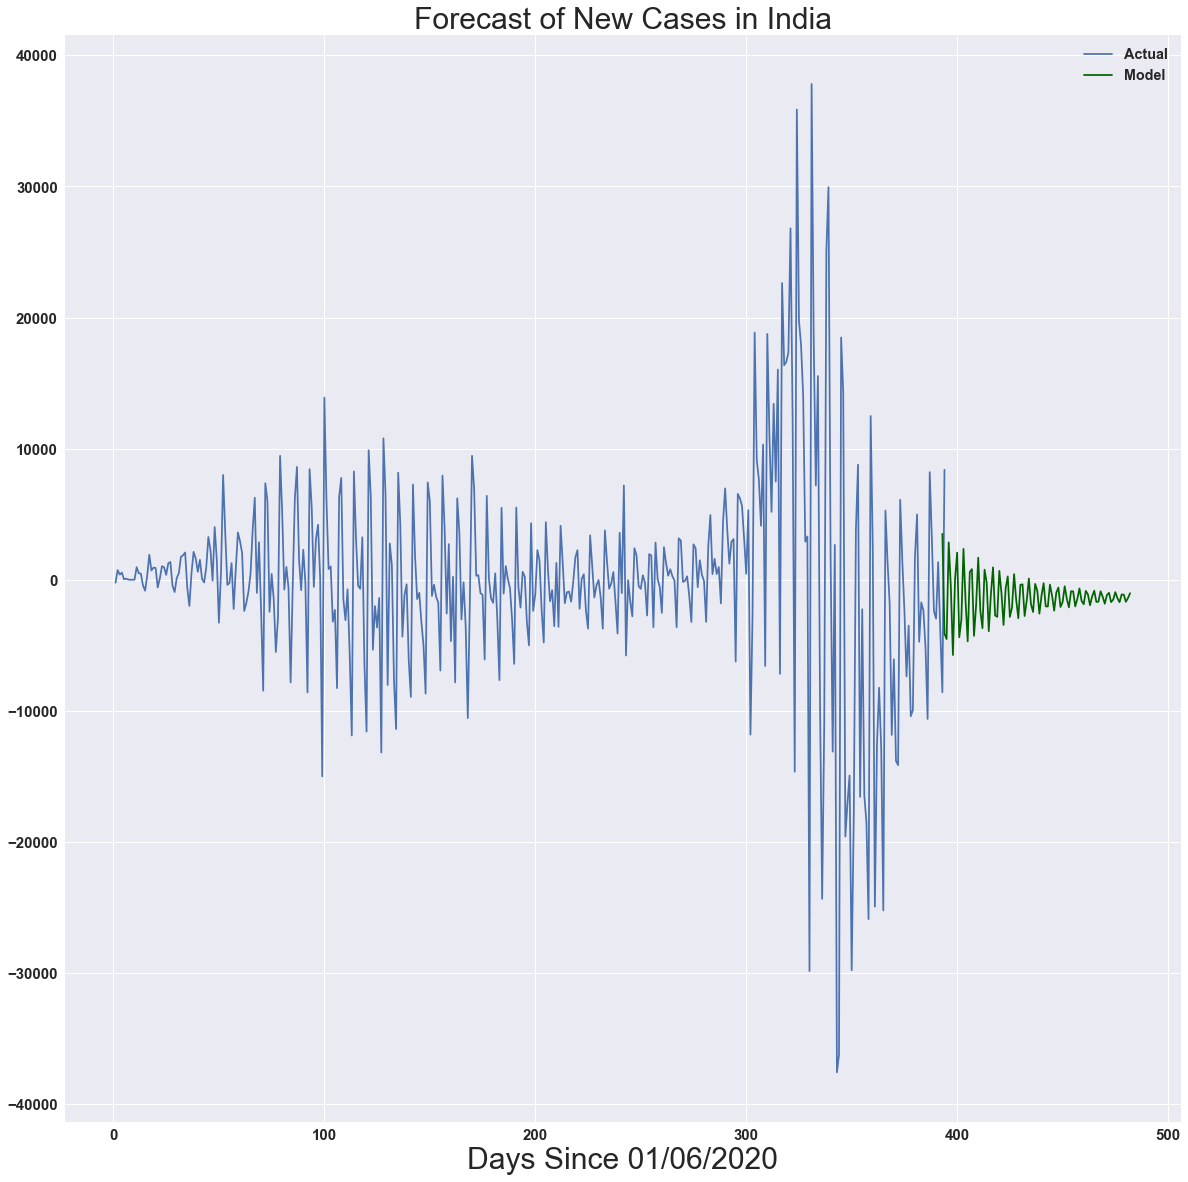

In [ ]:
Arima_Model('India')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8696.986, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8737.467, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8727.527, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8719.357, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8693.999, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8717.400, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8691.010, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8713.817, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=8623.721, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8643.813, Time=0.17 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8606.540, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8688.012, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8695.587, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : 

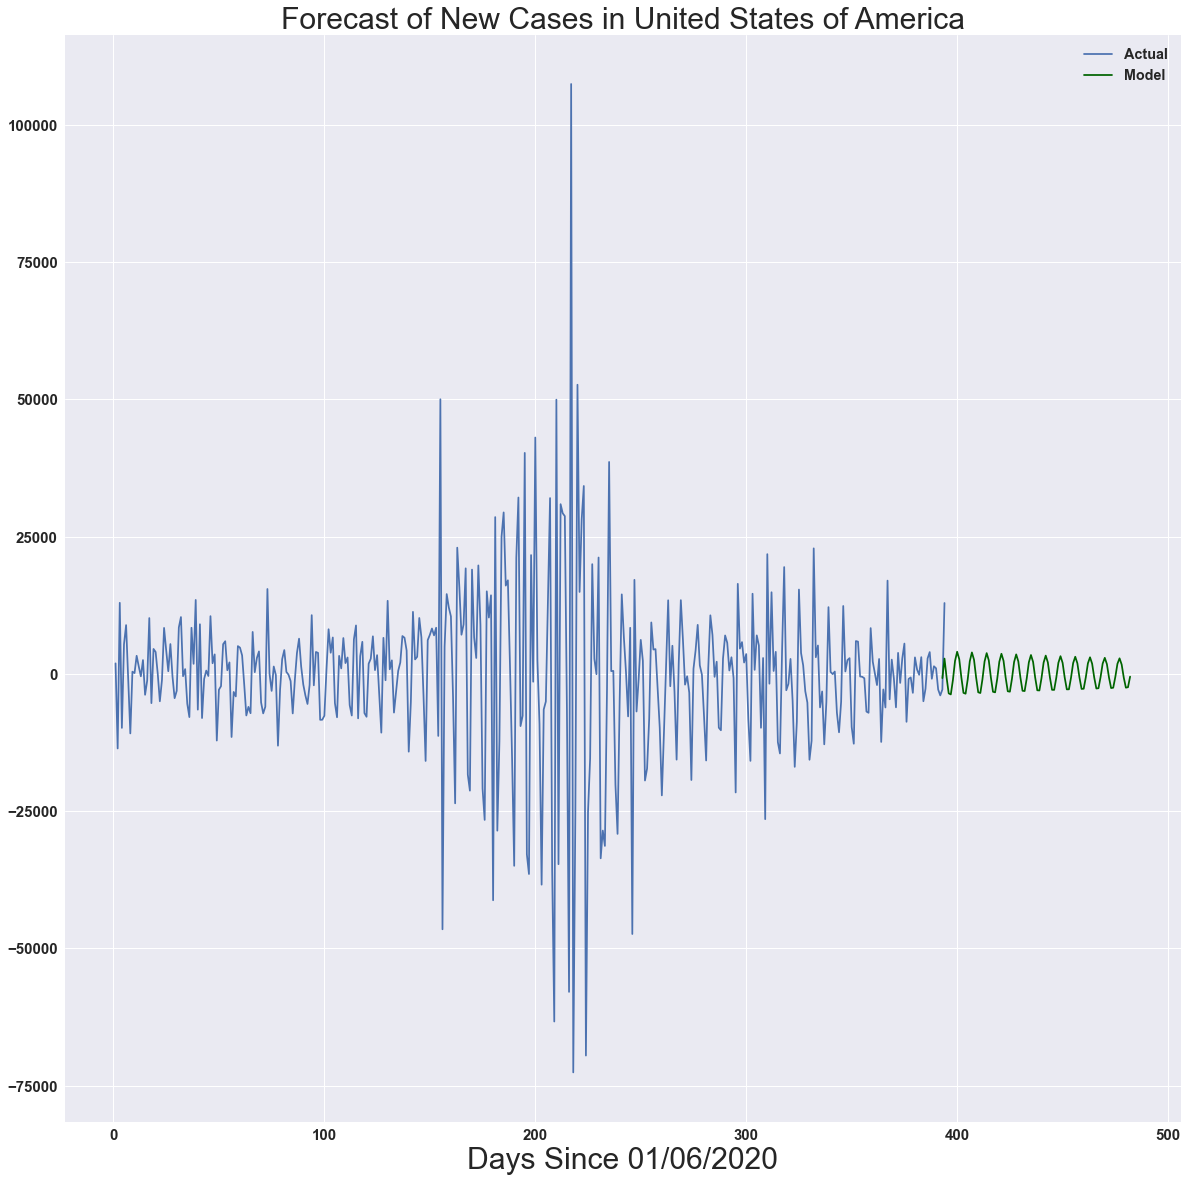

In [ ]:
Arima_Model('United States of America')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8742.030, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8833.811, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8835.740, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8835.571, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8680.177, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8786.806, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8676.986, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8780.592, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=8726.022, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8624.436, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8714.286, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8553.439, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8680.842, Time=0.08 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=8611.436, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

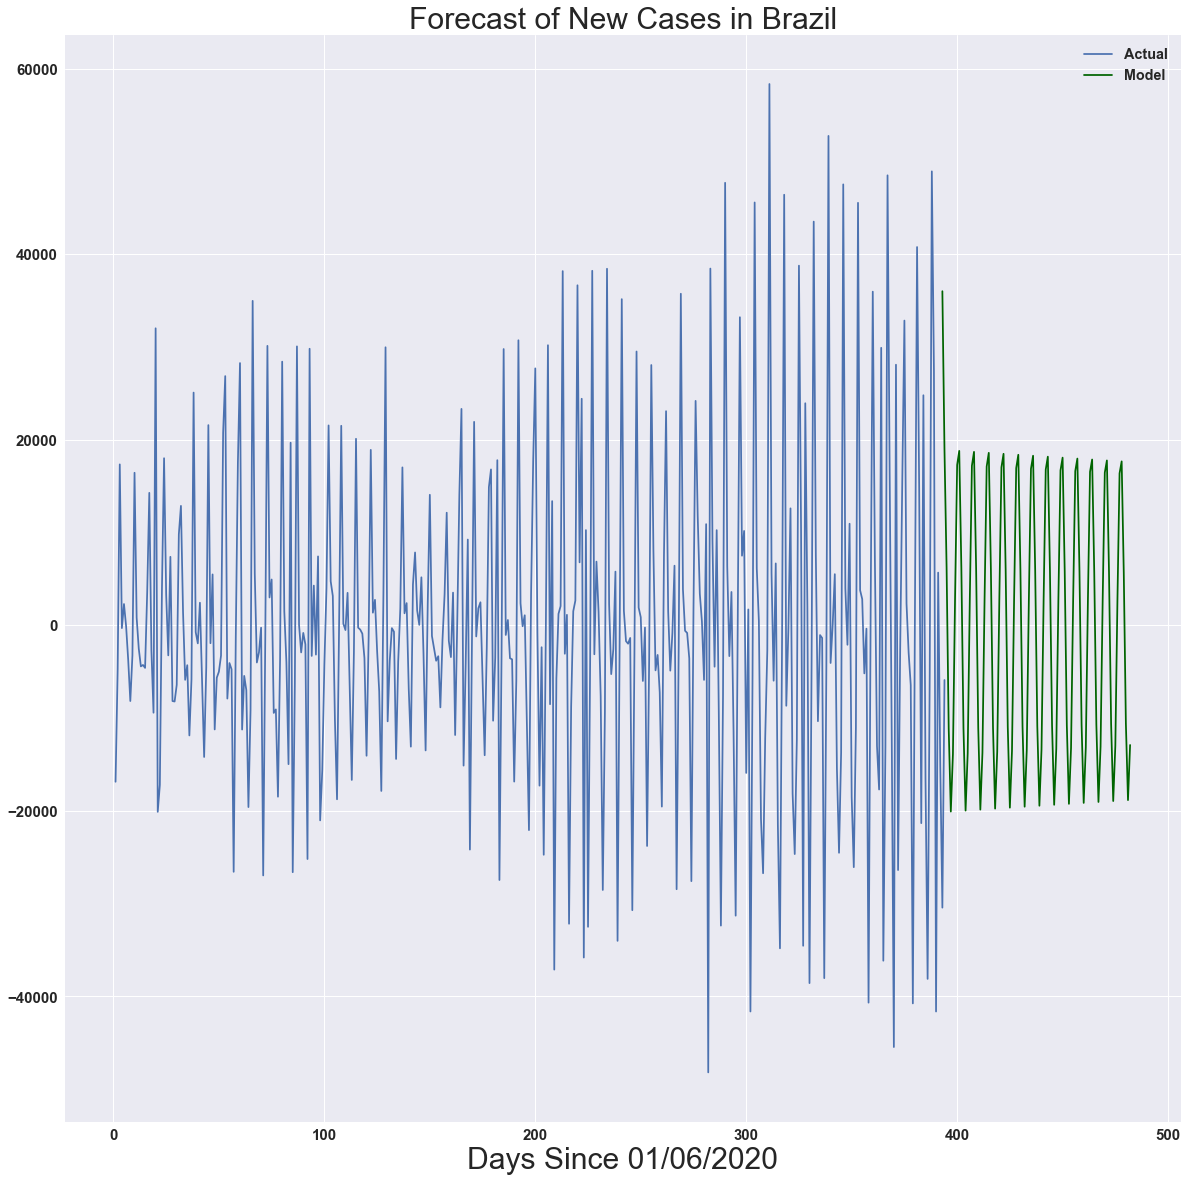

In [ ]:
Arima_Model('Brazil')


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4123.414, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4171.767, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4123.719, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4122.087, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4123.614, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4125.371, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4124.077, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.325 seconds


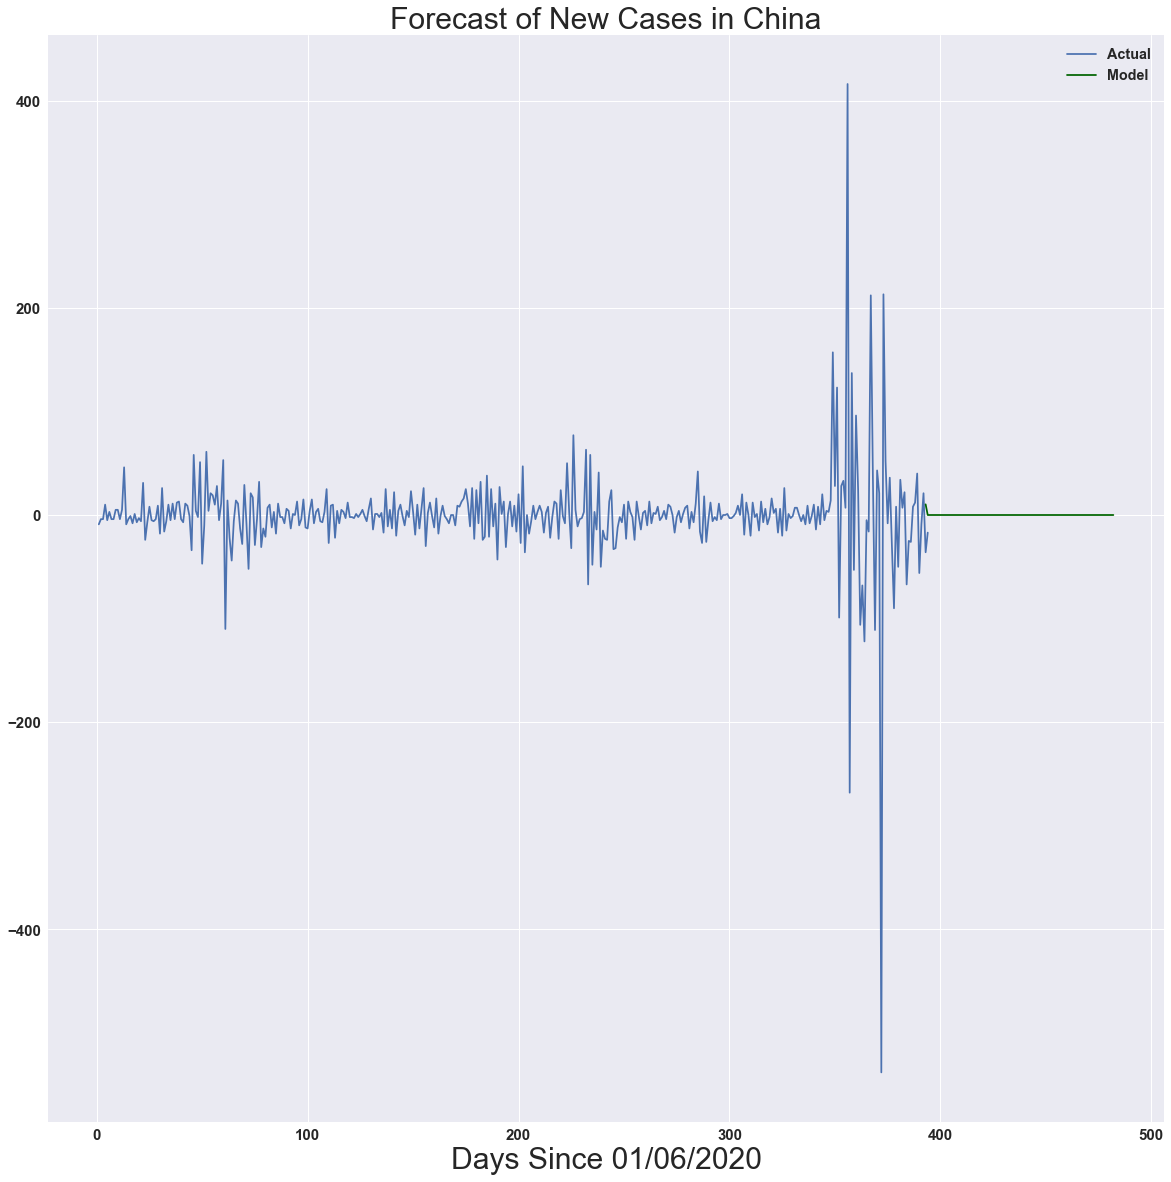

In [ ]:
Arima_Model('China')


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5821.290, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5826.819, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5822.658, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5821.085, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5817.845, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5808.218, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5735.408, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5799.430, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5734.401, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5791.394, Time=0.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5730.936, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5806.822, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5732.807, Time=0.47 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]  

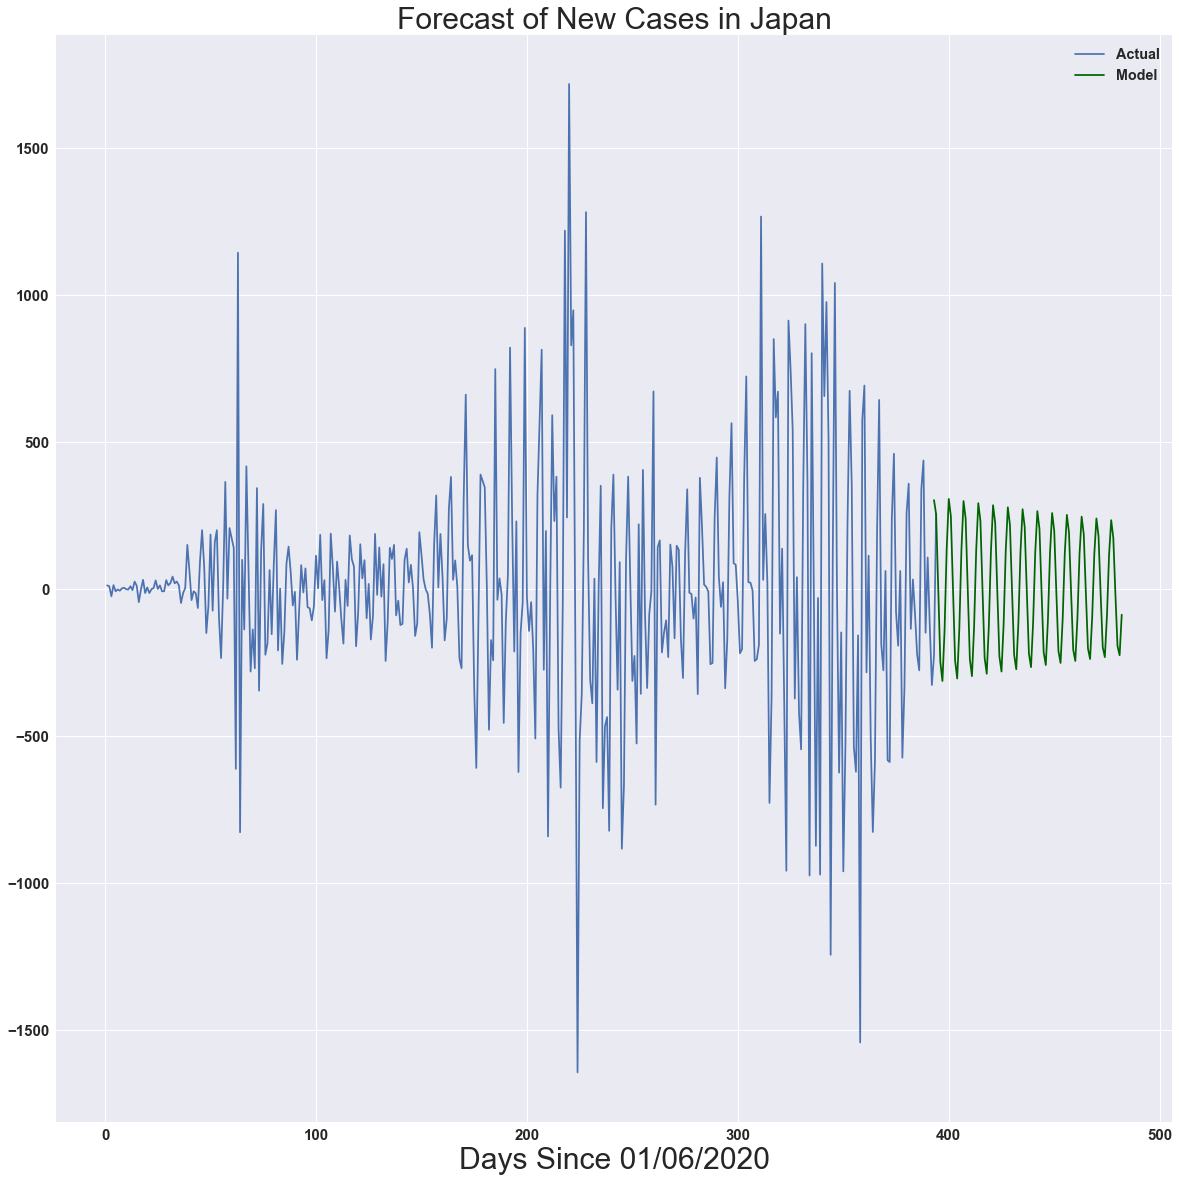

In [ ]:
Arima_Model('Japan')

There are propably many models that work better than these two models , but that is left to further exploration. To conclude, we would say that these two models could aid us in forecasting time series data to some extent.

# Task 4 - Evaluating Models

For the linear model perspective ,   we could see that the prediction line is not quite accurate. For the Viet Nam mese number of new cases : 

MAE: 220.84923197788015
MSE: 49253.28644700647


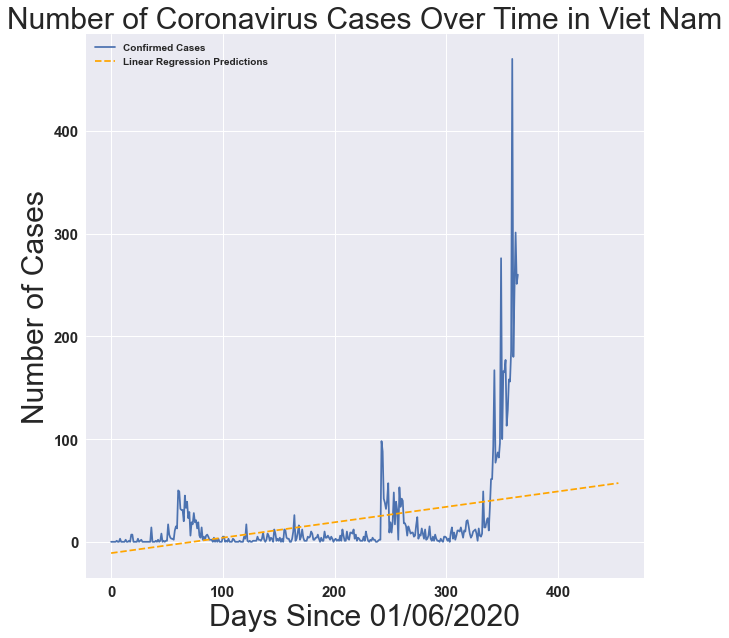

In [ ]:
Linear_Model('Viet Nam')

As we can see here, the prediction line is quite far from what had actually occured, since in the last days in the periods , the number of new cases in Viet Nam spiked significantly. Hence, the predictio is off the mark. If I set the training data portion to be lower ( meaning that the portion for the testing set is bigger ), the prediction is even further from the expected values.

MAE: 12972.878254847608
MSE: 232923389.37247562


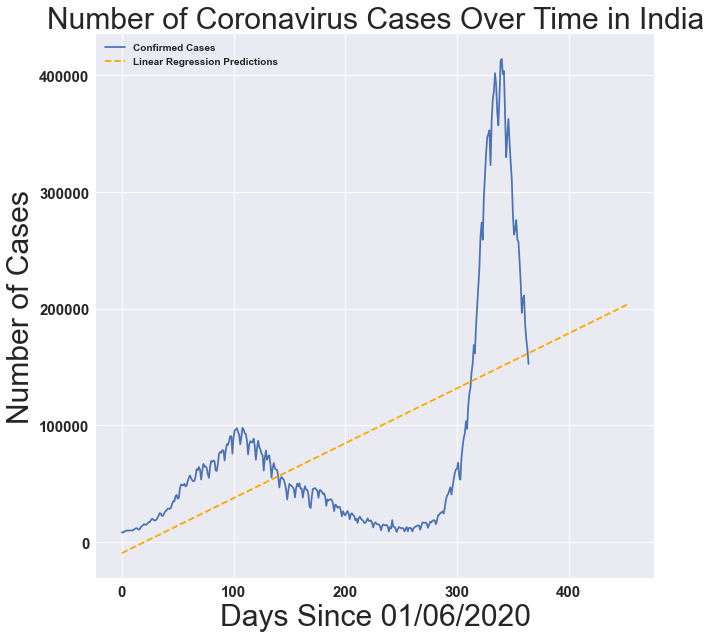

In [ ]:
Linear_Model('India')

The same thing happened with India, since it cannot capture the events in which the case number abruptly increased like that. Not to mention that the MAE (Mean Absolute Error) and MSE(Mean Squared Errors) varies quite a lot with different countries.

The Linear Model( the line) can somewhat stay closer to the expected value wiht Japan. However, as mentioned just right above, the MAE metrics stil varies by quite a large range.

MAE: 591.2452754268647
MSE: 636730.3108204335


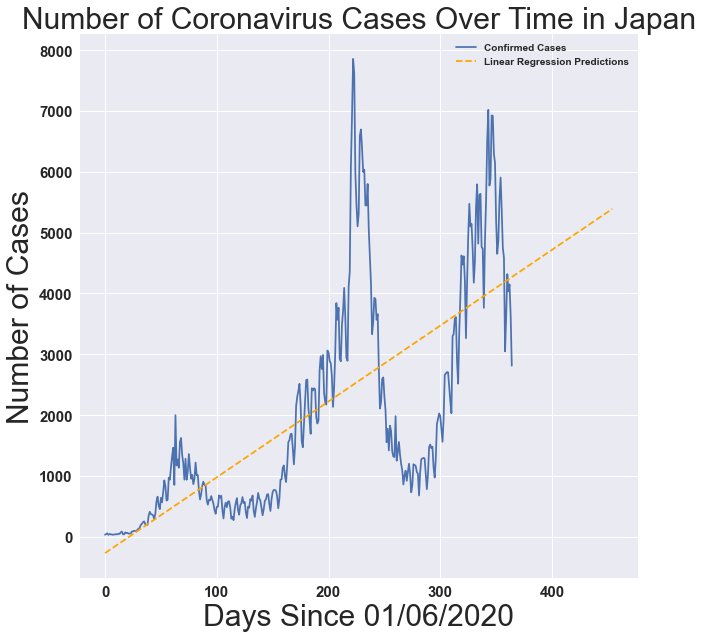

In [ ]:
Linear_Model('Japan')

To conclude, we would say that the Linear Model Regression cannot fully reflect and forecast the data in time series matters in general and the number of covid cases in particular.

The Arima Model has three parameters :

- p: The number of lag observations included in the model, also called the lag order. (Coming from the AR model)

- d: The number of times that the raw observations are differenced, also called the degree of differencing. (to help make data more stationary by removing trends, seasonalities, etc.)

- q: The size of the moving average window, also called the order of moving average.(Coming from the MA model)

The Arima Model has a weakness : it can only show you the predicted difference of consecutive observed datas in the future, not the actual data themselves, since the actual data (in this case, the number of covid cases ) is not stationary(meaning that the data contains trends, seasonalities, changing levels). However, the prediction made by the Arima model seems to stay closer to the actual data.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4055.989, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4266.712, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4143.524, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4057.230, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4057.235, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4040.920, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4055.736, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4058.531, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4056.690, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4057.602, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4052.880, Time=0.19 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.212 seconds


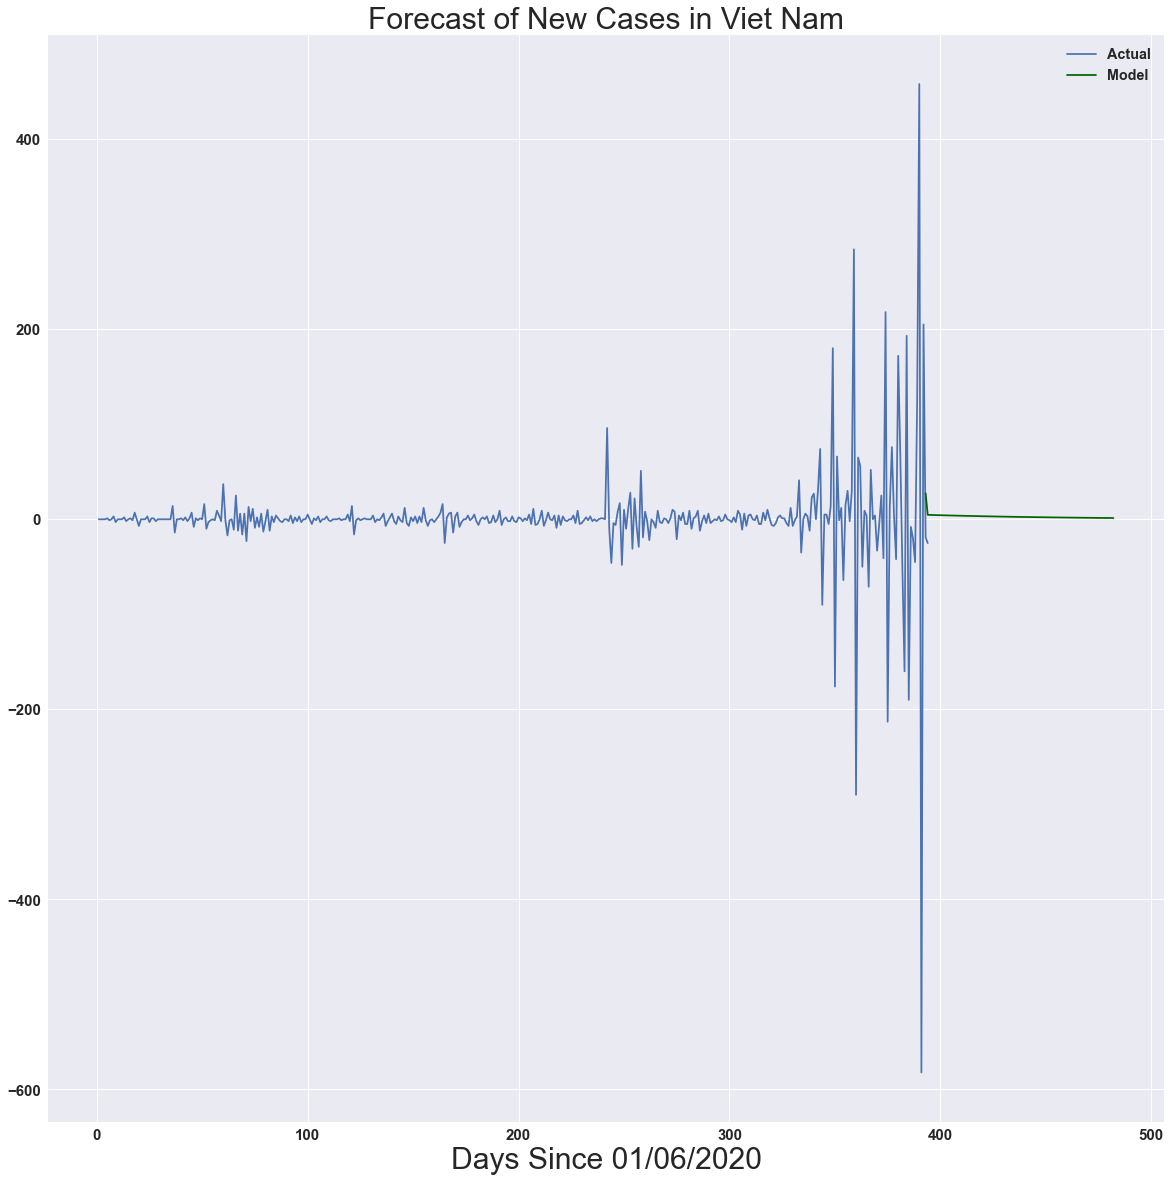

In [ ]:
Arima_Model('Viet Nam')

In this case, the model predicts that in the days to come, the difference of the number of cases in consecutive days will be really small in the coming future.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8696.986, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8737.467, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8727.527, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8719.357, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8693.999, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8717.400, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8691.010, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8713.817, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=8623.721, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8643.813, Time=0.17 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8606.540, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8688.012, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8695.587, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : 

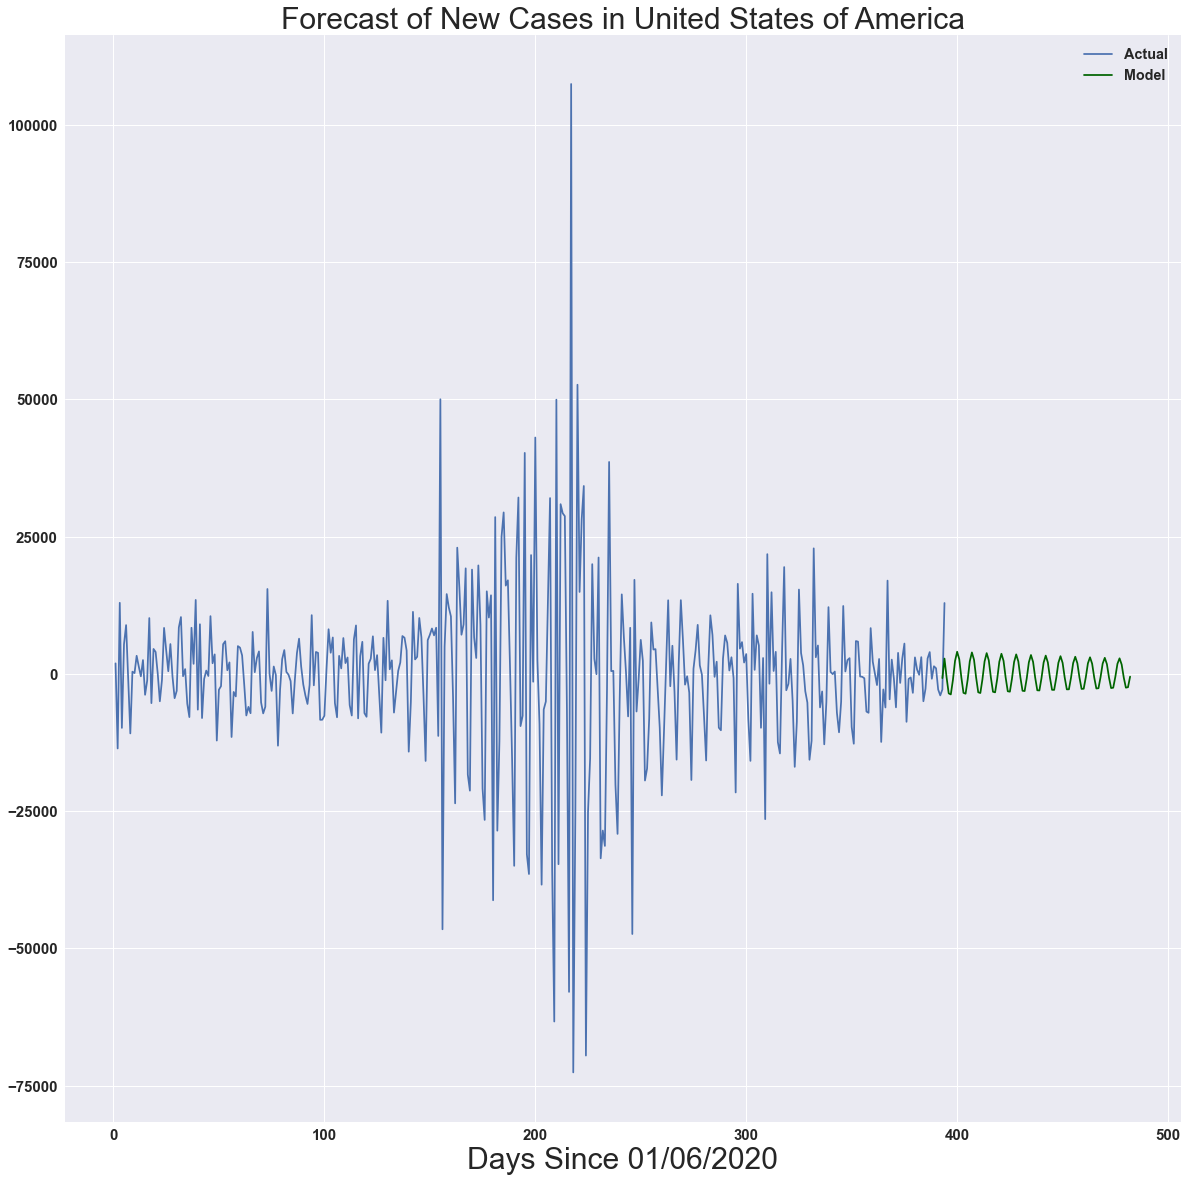

In [ ]:
Arima_Model('United States of America')

With America, that differnce is still relatively small, but it is not going close to zero.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5821.290, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5826.819, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5822.658, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5821.085, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5817.845, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5808.218, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5735.408, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5799.430, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5734.401, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5791.394, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5730.936, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5806.822, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5732.807, Time=0.45 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]  

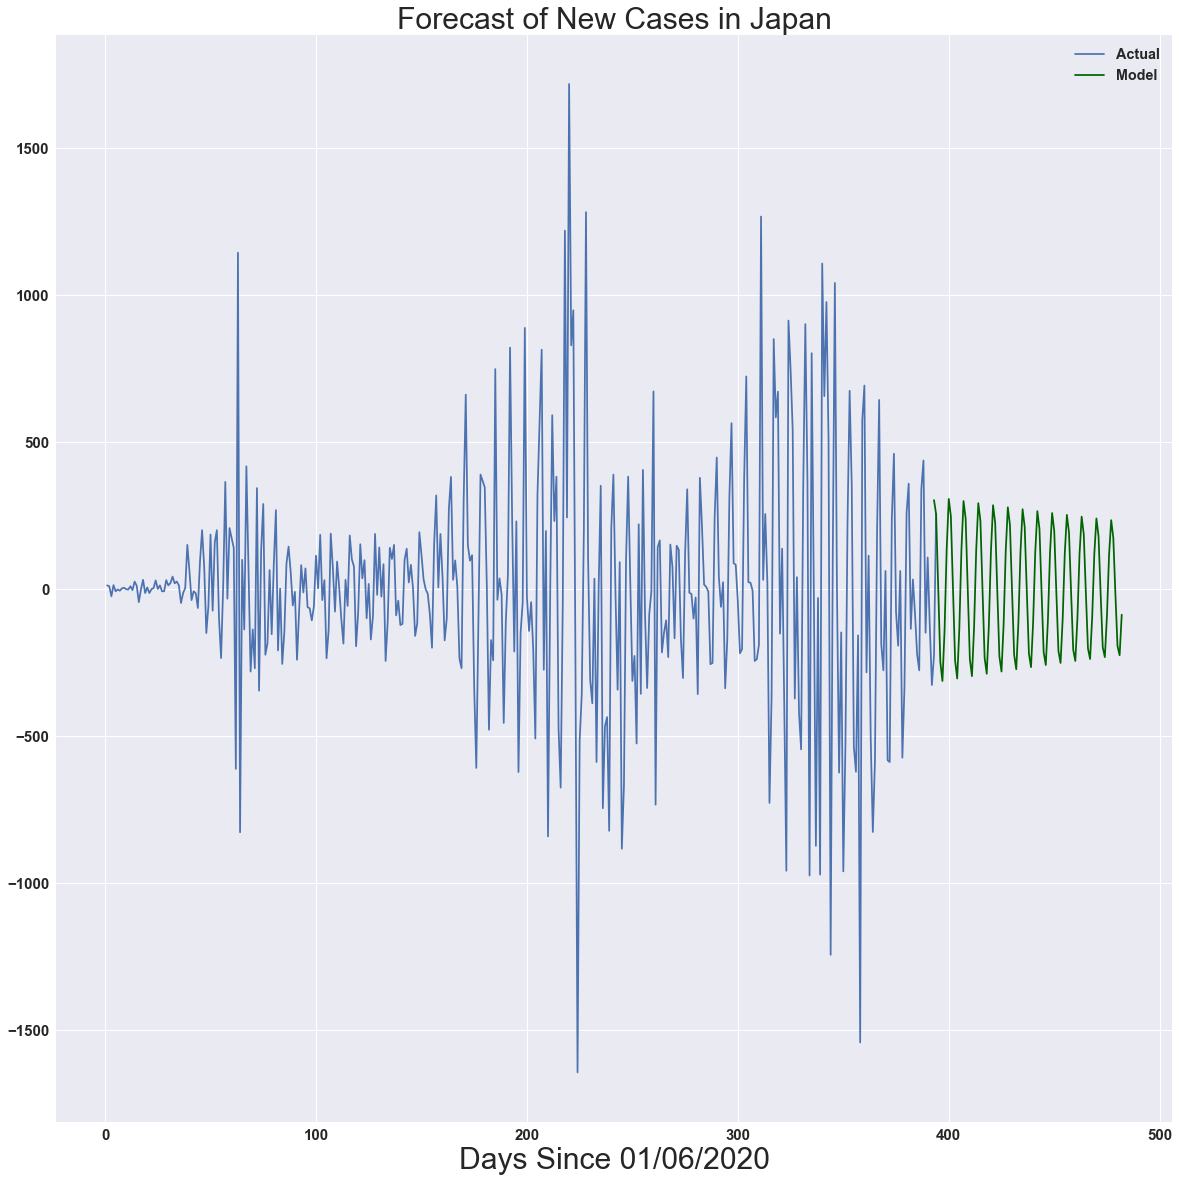

In [ ]:
Arima_Model('Japan')

The model works by finding in a step-wise search, looking for the suitable parameters of p , d and q.

The number of p tells us that the model is going to use the data from the past to predict the future, while the number of q tells us that the model is going to work based on the errors from the past(meaning the difference in actual data and predicted data) .

We are still not sure about the best method to predict the number of cases in the future, but this is our best effort in doing so.
